<a href="https://colab.research.google.com/github/Faizack/Clone/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import  DecisionTreeClassifier
from scipy.stats import zscore

from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [100]:
#reading the data-pandas dataframe
bankdata=pd.read_csv("/content/bank-full.csv",sep=';')
bankdata.head() #first 5 records of file for sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [101]:
print("Shape",bankdata.shape) #Shape- no of rows and columns
print("Size",bankdata.size) #Size- number of elements in the data file

Shape (45211, 17)
Size 768587


In [102]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [103]:
details(bankdata)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
age,0,0.0,int64,77
job,0,0.0,object,12
marital,0,0.0,object,3
education,0,0.0,object,4
default,0,0.0,object,2
balance,0,0.0,int64,7168
housing,0,0.0,object,2
loan,0,0.0,object,2
contact,0,0.0,object,3
day,0,0.0,int64,31


In [104]:
from sklearn.preprocessing import LabelEncoder

In [107]:
def label_encode(df):
    """
    Performs label encoding for all object and category type columns in a dataframe,
    including the target column. Returns the encoded dataframe.
    """
    # Create a copy of the dataframe
    encoded_df = df.copy()
    
    # Create a LabelEncoder object
    le = LabelEncoder()
    
    # Encode object and category type columns
    for col in encoded_df.select_dtypes(include=['object', 'category']):
        encoded_df[col] = le.fit_transform(encoded_df[col])
    
    # Encode the target variable
    encoded_df['y'] = le.fit_transform(encoded_df['y'])
    
    return encoded_df

In [108]:
df1 = label_encode(bankdata)

In [110]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Splitting Dataset into train and test with 70 and 30 ratio

In [111]:
x=df1.drop(['y'], axis=1)
Y=df1['y']
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [112]:
from sklearn.model_selection import cross_val_score

def evaluate_models(X_train, y_train, X_test, y_test):
    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes (Gaussian)': GaussianNB(),
        'Random Forest': RandomForestClassifier(),     
    }

    # Fit the models, make predictions, and calculate evaluation metrics
    results = {}
    for name, model in models.items():
        # Fit the model using cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Model: {name}")
        print(f"Cross-validation scores: {scores}")
        print(f"Mean cross-validation score: {scores.mean()}")
        print(f"Standard deviation of cross-validation scores: {scores.std()}")

        # Fit the model on the entire training set and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_roc = roc_auc_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc_roc': auc_roc,
            'confusion': confusion,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        }
        
        # Print the evaluation metrics
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"AUC-ROC: {auc_roc}")
        print(f"Confusion Matrix:\n{confusion}")
        print("")

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(name + ' ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    return results


Model: Logistic Regression
Cross-validation scores: [0.88799368 0.88878357 0.88671196 0.88513193 0.88718597]
Mean cross-validation score: 0.887161422744472
Standard deviation of cross-validation scores: 0.0012365650833266336
Accuracy: 0.8859480979062223
Precision: 0.7028466368175721
Recall: 0.577653786090214
F1 Score: 0.6005870350945548
AUC-ROC: 0.577653786090214
Confusion Matrix:
[[11741   272]
 [ 1275   276]]



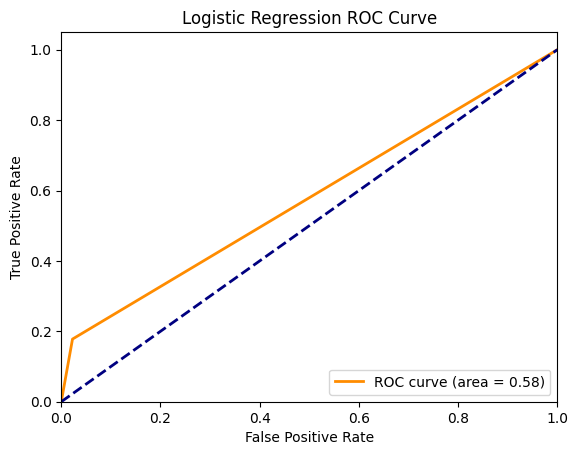

Model: Decision Tree
Cross-validation scores: [0.87519747 0.87203791 0.86948965 0.86316954 0.86474957]
Mean cross-validation score: 0.8689288280806748
Standard deviation of cross-validation scores: 0.004470179228141621
Accuracy: 0.8740784429371866
Precision: 0.6905685391715898
Recall: 0.6950446923419465
F1 Score: 0.692764429891344
AUC-ROC: 0.6950446923419467
Confusion Matrix:
[[11138   875]
 [  833   718]]



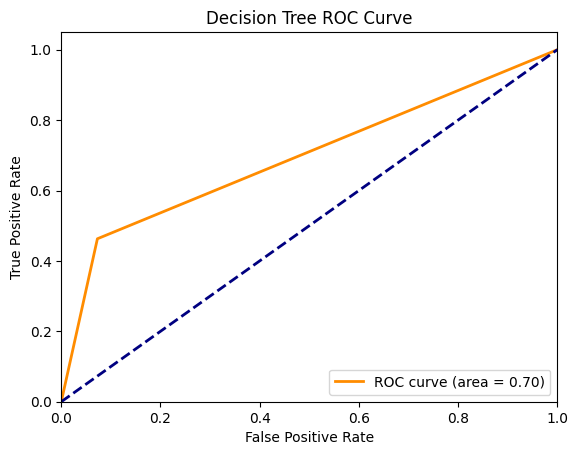

Model: K-Nearest Neighbors
Cross-validation scores: [0.8821485  0.87914692 0.87928583 0.88244588 0.88039185]
Mean cross-validation score: 0.8806837953730877
Standard deviation of cross-validation scores: 0.001389377587239991
Accuracy: 0.8835151872603951
Precision: 0.6977759903975348
Recall: 0.6203581945907193
F1 Score: 0.6450165814806199
AUC-ROC: 0.6203581945907192
Confusion Matrix:
[[11551   462]
 [ 1118   433]]



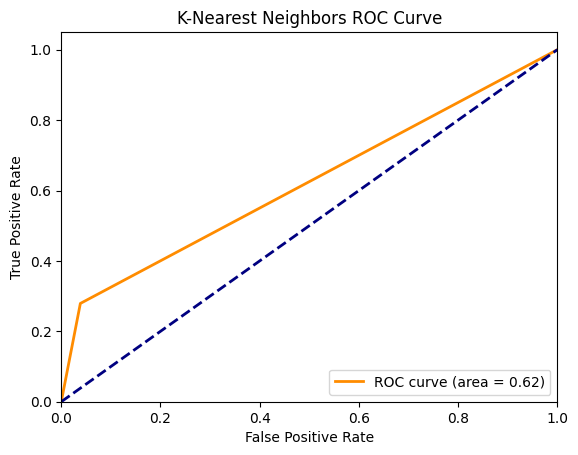

Model: Naive Bayes (Gaussian)
Cross-validation scores: [0.83649289 0.84075829 0.83709907 0.84405119 0.83804708]
Mean cross-validation score: 0.8392897060772686
Standard deviation of cross-validation scores: 0.0027926218949200343
Accuracy: 0.841049837805957
Precision: 0.6378645149521884
Recall: 0.6716254575488633
F1 Score: 0.6512846929827386
AUC-ROC: 0.6716254575488633
Confusion Matrix:
[[10707  1306]
 [  850   701]]



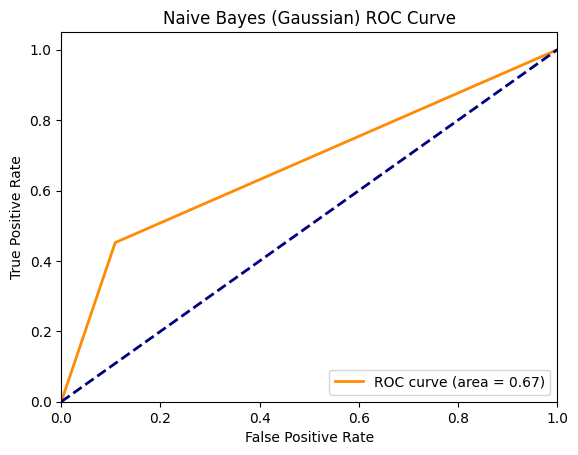

Model: Random Forest
Cross-validation scores: [0.9042654  0.9        0.90361827 0.90377627 0.90741033]
Mean cross-validation score: 0.9038140538662397
Standard deviation of cross-validation scores: 0.0023547275928080687
Accuracy: 0.9057062813329402
Precision: 0.7809843068644715
Recall: 0.6915632661650717
F1 Score: 0.7244547359720471
AUC-ROC: 0.6915632661650718
Confusion Matrix:
[[11643   370]
 [  909   642]]



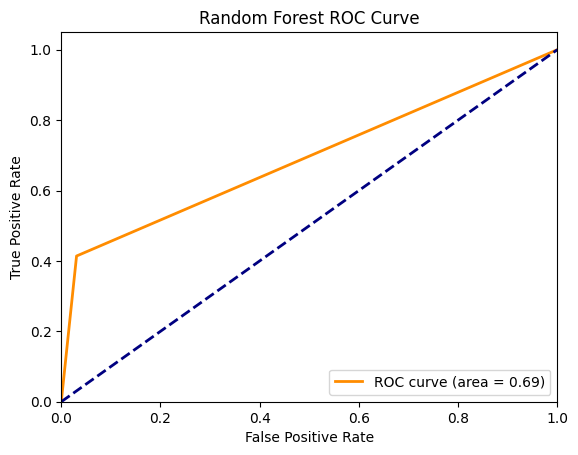

{'Logistic Regression': {'accuracy': 0.8859480979062223, 'precision': 0.7028466368175721, 'recall': 0.577653786090214, 'f1': 0.6005870350945548, 'auc_roc': 0.577653786090214, 'confusion': array([[11741,   272],
       [ 1275,   276]]), 'fpr': array([0.        , 0.02264214, 1.        ]), 'tpr': array([0.        , 0.17794971, 1.        ]), 'roc_auc': 0.577653786090214}, 'Decision Tree': {'accuracy': 0.8740784429371866, 'precision': 0.6905685391715898, 'recall': 0.6950446923419465, 'f1': 0.692764429891344, 'auc_roc': 0.6950446923419467, 'confusion': array([[11138,   875],
       [  833,   718]]), 'fpr': array([0.        , 0.07283776, 1.        ]), 'tpr': array([0.        , 0.46292714, 1.        ]), 'roc_auc': 0.6950446923419467}, 'K-Nearest Neighbors': {'accuracy': 0.8835151872603951, 'precision': 0.6977759903975348, 'recall': 0.6203581945907193, 'f1': 0.6450165814806199, 'auc_roc': 0.6203581945907192, 'confusion': array([[11551,   462],
       [ 1118,   433]]), 'fpr': array([0.        , 

In [113]:
results = evaluate_models(x_train, Y_train, x_test, Y_test)

print(results)